**stock prediction:**

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/stockpriceINDIA.csv')


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,07-02-2022,1765.000000,1765.500000,1722.099976,1731.800049,1731.064209,854871
1,08-02-2022,1739.400024,1747.000000,1677.050049,1716.000000,1715.270874,1480201
2,09-02-2022,1724.599976,1791.900024,1718.099976,1783.150024,1782.392334,1674022
3,10-02-2022,1799.000000,1809.000000,1766.000000,1786.099976,1785.341064,1747943
4,11-02-2022,1764.000000,1774.900024,1743.349976,1764.300049,1763.550415,1196002


In [ ]:
data['Raise percentage']=(data['Close']-data['Open'])/data['Close']*100

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Raise percentage
0,07-02-2022,1765.000000,1765.500000,1722.099976,1731.800049,1731.064209,854871,-1.917078
1,08-02-2022,1739.400024,1747.000000,1677.050049,1716.000000,1715.270874,1480201,-1.363638
2,09-02-2022,1724.599976,1791.900024,1718.099976,1783.150024,1782.392334,1674022,3.283518
3,10-02-2022,1799.000000,1809.000000,1766.000000,1786.099976,1785.341064,1747943,-0.722245
4,11-02-2022,1764.000000,1774.900024,1743.349976,1764.300049,1763.550415,1196002,0.017007


twitter analysis

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 4.1 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter



In [ ]:
#query = "(from:elonmusk) until:2020-01-01 since:2010-01-01"
query="adani  (bear OR bull OR scam OR insiderinformation OR equity OR divident OR trading) lang:en until:2023-02-05 since:2023-02-04"
tweets = []
limit = 10


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)


                       Date             User  \
0 2023-02-04 23:44:28+00:00     KashmirWatch   
1 2023-02-04 23:32:43+00:00   Digitam_Design   
2 2023-02-04 23:19:24+00:00  sridhar_kondoji   
3 2023-02-04 23:17:39+00:00   justpavankumar   
4 2023-02-04 23:07:54+00:00         draj8910   
5 2023-02-04 22:57:37+00:00     chilicasuals   
6 2023-02-04 22:51:25+00:00  SamratM23546369   
7 2023-02-04 22:40:07+00:00   metaphysics295   
8 2023-02-04 22:36:43+00:00     ANSHUBAJPAI1   
9 2023-02-04 22:34:27+00:00       mhpetiwala   

                                               Tweet  
0  India’s probity on line: Financial Times on Ad...  
1  @MahuaMoitra This Adani is head to toe covered...  
2  @GayathriBDevi @KTRBRS Adani has $30B debt of ...  
3  @sanchit_gs @Cric_gal It won’t break India. In...  
4  #MahaMegaScam\n#AdaniScam2023\n#AdaniFiles\n\n...  
5  @Jairam_Ramesh Pappu linked Adani scam. Gehlot...  
6  @jawharsircar I don’t think Adani’s airplanes ...  
7  @NetflixIndia plz record all

<ipython-input-50-5ca2cc863222>:14: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
<ipython-input-50-5ca2cc863222>:14: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.5 MB/s eta 0:00:00


In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#modal and token
roberta="cardiffnlp/twitter-roberta-base-sentiment"

model=AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer=AutoTokenizer.from_pretrained(roberta)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
tweet="Any Idea why are these Gujaratis such a scam (For eg. Harshad Mehta, Ketan Parikh, Ambani, Adani, N Modi, M Choksi and many others)"
tweet_words=[]
for word in tweet.split(' '):
  if word.startswith('@') and len(word)>1:
    word="@user"
  elif word.startswith('http') and len(word)>1:
    word="http"
  tweet_words.append(word)
tweet_proc=" ".join(tweet_words)
print(tweet_proc)
labels=['negative','neutral','positive']
#sentiment analysis
encoded_tweet=tokenizer(tweet_proc,return_tensors="pt")
#print(encoded_tweet)
output=model(**encoded_tweet)
scores=output[0][0].detach().numpy()
print(scores)




Any Idea why are these Gujaratis such a scam (For eg. Harshad Mehta, Ketan Parikh, Ambani, Adani, N Modi, M Choksi and many others)
[ 1.4745454  0.9411415 -2.4796104]


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4864940dd500f0e23a18b8ec935fbb00bc34e174146cd1ed74903491ce4d511a
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
y = data['Raise percentage']
 #Load X Variables into a Pandas Dataframe with columns
X = data.drop(['Raise percentage'], axis = 1)

analysis

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


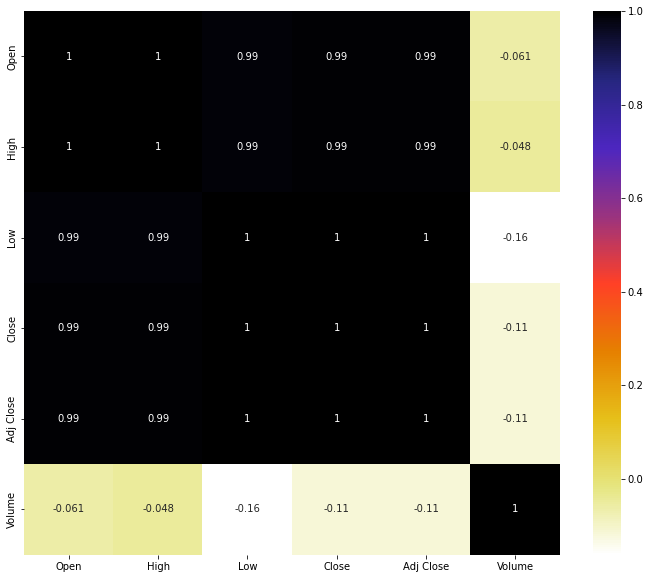

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100,test_size=0.3)
#Using Pearson Correlation
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [ ]:
#integrate botht the dataset and the twitter
data.dtypes
from datetime import datetime, timedelta, date
from statistics import mode

In [ ]:
for index1 in range(len(data)):
  #print(index)
  #print(row['Date'])
  #if index<240:
    #print(index)
    #continue
  datetemp=datetime.strptime(data['Date'][index1],'%d-%m-%Y')
  datestart=datetemp - timedelta(days=1)
  datestart=((datestart.date()))
  query="adani  (bear OR bull OR scam OR insiderinformation OR equity OR divident OR trading) lang:en until:"+str(datetemp.date())+" since:"+str(datestart)
  #query="adani  (bear OR bull OR scam OR insiderinformation OR equity OR divident OR trading) lang:en until:2023-02-05 since:2023-02-04"
  tweets = []
  limit = 1000


  for tweet in sntwitter.TwitterSearchScraper(query).get_items():

       # print(vars(tweet))
       # break
       if len(tweets) == limit:
           break
       else:
          tweets.append([tweet.date, tweet.username, tweet.content])

  df      = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
  #print(df)
  scoreset=[]
  for index in range(len(df)):
    tweet=df['Tweet'][index]
    tweet_words=[]
    score=[]
    for word in tweet.split(' '):
      if word.startswith('@') and len(word)>1:
        word="@user"
      elif word.startswith('http') and len(word)>1:
        word="http"
      tweet_words.append(word)
    tweet_proc=" ".join(tweet_words)
    #print(tweet_proc)
    labels=['negative','neutral','positive']
    #sentiment analysis
    encoded_tweet=tokenizer(tweet_proc,return_tensors="pt")
    #print(encoded_tweet)
    output=model(**encoded_tweet)
    scores=output[0][0].detach().numpy()
    if(scores[0]>scores[1] and scores[0]>scores[1]):
      scoreset.append("negative")
    else:
      scoreset.append("positive")
  #print(scoreset)

  #avgofscore=[sum(sublist)/len(sublist) for sublist in zip(*scoreset)]
  avgofscore=mode(scoreset)
  print(index1,avgofscore)
  data.loc[index1, 'a']=avgofscore
  print(data.loc[index1, 'a'])
  #break

<ipython-input-175-ae5214a27c2f>:23: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
<ipython-input-175-ae5214a27c2f>:23: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


0 positive
positive
1 positive
positive
2 positive
positive
3 positive
positive
4 positive
positive
5 negative
negative
6 negative
negative
7 negative
negative
8 positive
positive
9 positive
positive
10 positive
positive
11 negative
negative
12 negative
negative
13 positive
positive
14 negative
negative
15 positive
positive
16 negative
negative
17 positive
positive
18 positive
positive
19 positive
positive
20 positive
positive
21 positive
positive
22 negative
negative
23 positive
positive
24 positive
positive
25 positive
positive
26 positive
positive
27 positive
positive
28 positive
positive
29 negative
negative
30 positive
positive
31 positive
positive
32 positive
positive
33 positive
positive
34 positive
positive
35 positive
positive
36 positive
positive
37 positive
positive
38 positive
positive
39 positive
positive
40 positive
positive
41 positive
positive
42 positive
positive
43 positive
positive
44 positive
positive
45 positive
positive
46 positive
positive
47 positive
positive
48

In [ ]:
print(data.to_string())

           Date         Open         High          Low        Close    Adj Close    Volume  Raise percentage         a
0    07-02-2022  1765.000000  1765.500000  1722.099976  1731.800049  1731.064209    854871         -1.917078  positive
1    08-02-2022  1739.400024  1747.000000  1677.050049  1716.000000  1715.270874   1480201         -1.363638  positive
2    09-02-2022  1724.599976  1791.900024  1718.099976  1783.150024  1782.392334   1674022          3.283518  positive
3    10-02-2022  1799.000000  1809.000000  1766.000000  1786.099976  1785.341064   1747943         -0.722245  positive
4    11-02-2022  1764.000000  1774.900024  1743.349976  1764.300049  1763.550415   1196002          0.017007  positive
5    14-02-2022  1736.300049  1737.900024  1653.000000  1663.949951  1663.242920   1919476         -4.348093  negative
6    15-02-2022  1636.000000  1751.400024  1627.849976  1744.250000  1743.508789   2261554          6.206106  negative
7    16-02-2022  1744.250000  1776.000000  1730.

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Raise percentage,a
0,07-02-2022,1765.000000,1765.500000,1722.099976,1731.800049,1731.064209,854871,-1.917078,positive
1,08-02-2022,1739.400024,1747.000000,1677.050049,1716.000000,1715.270874,1480201,-1.363638,positive
2,09-02-2022,1724.599976,1791.900024,1718.099976,1783.150024,1782.392334,1674022,3.283518,positive
3,10-02-2022,1799.000000,1809.000000,1766.000000,1786.099976,1785.341064,1747943,-0.722245,positive
4,11-02-2022,1764.000000,1774.900024,1743.349976,1764.300049,1763.550415,1196002,0.017007,positive


In [ ]:
data = data.rename(columns={'a':'sentiment'})

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Raise percentage,sentiment
0,07-02-2022,1765.000000,1765.500000,1722.099976,1731.800049,1731.064209,854871,-1.917078,positive
1,08-02-2022,1739.400024,1747.000000,1677.050049,1716.000000,1715.270874,1480201,-1.363638,positive
2,09-02-2022,1724.599976,1791.900024,1718.099976,1783.150024,1782.392334,1674022,3.283518,positive
3,10-02-2022,1799.000000,1809.000000,1766.000000,1786.099976,1785.341064,1747943,-0.722245,positive
4,11-02-2022,1764.000000,1774.900024,1743.349976,1764.300049,1763.550415,1196002,0.017007,positive


In [ ]:
import numpy as np
data['buy/sell']=np.where((data["Raise percentage"]>0) & (data["sentiment"]=="positive"),"buy","sell")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Raise percentage,sentiment,buy/sell
0,07-02-2022,1765.000000,1765.500000,1722.099976,1731.800049,1731.064209,854871,-1.917078,positive,sell
1,08-02-2022,1739.400024,1747.000000,1677.050049,1716.000000,1715.270874,1480201,-1.363638,positive,sell
2,09-02-2022,1724.599976,1791.900024,1718.099976,1783.150024,1782.392334,1674022,3.283518,positive,buy
3,10-02-2022,1799.000000,1809.000000,1766.000000,1786.099976,1785.341064,1747943,-0.722245,positive,sell
4,11-02-2022,1764.000000,1774.900024,1743.349976,1764.300049,1763.550415,1196002,0.017007,positive,buy


In [ ]:
finaldata=data[["Date","Raise percentage","sentiment","buy/sell"]]

In [ ]:
data['Raise percentage']=np.where((data["Raise percentage"]>0),"positive","negative")
finaldata.head()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
finaldata["Raise percentage"]= label_encoder.fit_transform(finaldata['Raise percentage'])
finaldata["sentiment"]=label_encoder.fit_transform(finaldata['sentiment'])
finaldata["buy/sell"]=label_encoder.fit_transform(finaldata['buy/sell'])
finaldata["Raise percentage"]=data["Raise percentage"]

In [ ]:
#finaldata=finaldata.drop(["Date"],axis=1)

finaldata["Raise percentage"]=(data["Close"]-data["Open"])/data["Open"]
finaldata.head()

,Raise percentage,sentiment,buy/sell
0,-0.018810,1,1
1,-0.013453,1,1
2,0.033950,1,0
3,-0.007171,1,1
4,0.000170,1,0


In [ ]:
y = finaldata[data.columns[-1]]
X = finaldata.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X)

     Raise percentage  sentiment
0           -0.018810          1
1           -0.013453          1
2            0.033950          1
3           -0.007171          1
4            0.000170          1
..                ...        ...
243          0.015035          1
244         -0.002047          0
245         -0.287028          0
246         -0.333610          0
247          0.064966          0

[248 rows x 2 columns]


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Classifier = SVC(kernel="linear")

# Training the model on the training data and labels
Classifier.fit(X_train, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(X_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 62.66666666666667
Confusion Matrix
[[32  0]
 [28 15]]


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[32  0]
 [ 0 43]]
100.0


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs = 150)

Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.5260
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5260
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5260
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5260
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5260
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5260
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5260
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5260
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5260
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5260
Epoch 11/150
6/6 [===========

In [ ]:
y_pred=ann.predict(X_test)
print(confusion_matrix(y_test, np.round(y_pred)))
print(accuracy_score(y_test,np.round(y_pred))*100)
#print(np.round(y_pred))


3/3 [==============================] - 0s 4ms/step
[[32  0]
 [11 32]]
85.33333333333334
